<a href="https://colab.research.google.com/github/Dhruv-Raj/Yolo/blob/main/Lung_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Export code snippet and paste here
%cd /content 
!unzip -q /content/drive/MyDrive/Deep_Learning/Dataset_Detection_of_Lung_Infection.zip

/content
replace data/test/healthy/0101.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Import the necessary libraries

In [31]:
import seaborn as sns
import pandas  as pd
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import warnings
warnings.filterwarnings('ignore')

## Plot the sample images for all the classes 

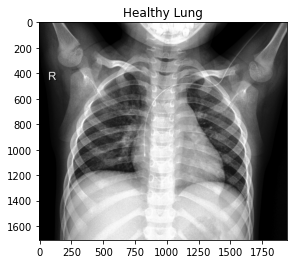

In [32]:
healthy_lung= image.imread('/content/data/train/Healthy/01.jpeg')
plt.imshow(healthy_lung)
plt.title('Healthy Lung');

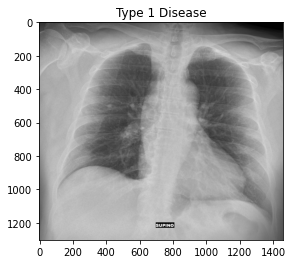

In [33]:
type1_lung= image.imread('/content/data/train/Type 1 disease/010.png')
plt.imshow(type1_lung)
plt.title('Type 1 Disease');

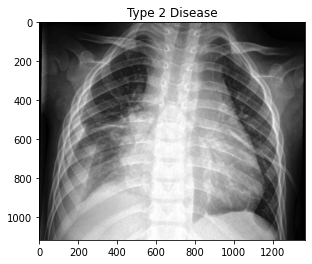

In [34]:
type2_lung= image.imread('/content/data/train/Type 2 disease/011.jpeg')
plt.imshow(type2_lung)
plt.title('Type 2 Disease');

## Plot the distribution of images across the classes

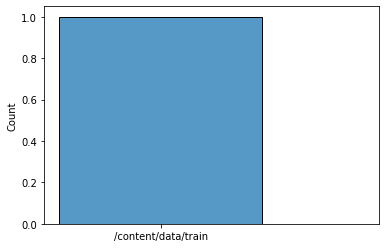

In [120]:
sns.histplot('/content/data/train', bins= 50)

## Train Data Augmentation

In [35]:
train_datagen= ImageDataGenerator(rescale= 1./255, # scale array of original image pixel values to be between [0,1].
                                     shear_range= 0.2,
                                     zoom_range= 0.2,
                                     horizontal_flip= True,
                                     vertical_flip= True,
                                     fill_mode='nearest')

In [36]:
training_set = train_datagen.flow_from_directory('/content/data/train',
                                                 target_size = (48, 48),  # Rescale image size to (48*48)
                                                 batch_size = 32,
                                                 classes= ['Healthy', 'Type 1 disease', 'Type 2 disease' ],
                                                 class_mode = 'categorical')

Found 251 images belonging to 3 classes.


In [37]:
training_set.class_indices

{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

## Test Data Augmentation

In [38]:
test_datagen= ImageDataGenerator(rescale= 1./255) # scale array of original image pixel values to be between [0,1].

In [39]:
testing_set= test_datagen.flow_from_directory('/content/data/test',
                                              target_size= (48, 48),
                                              batch_size= 32,
                                              classes= ['Healthy', 'Type 1 disease', 'Type 2 disease' ],
                                              class_mode= 'categorical')

Found 46 images belonging to 3 classes.


In [40]:
testing_set.class_indices

{'Healthy': 0, 'Type 1 disease': 1, 'Type 2 disease': 2}

## 1. CNN Architecture:

In [41]:
model= Sequential()

In [42]:
model.add(Conv2D(filters= 32,
                 kernel_size= 3,
                 activation= 'relu',
                 padding= 'valid',
                 input_shape= [48, 48, 3]))

In [43]:
model.add(MaxPool2D(pool_size= 2))

In [44]:
model.add(Conv2D(filters= 16,
                 kernel_size= 3,
                 activation= 'relu',
                 padding= 'valid',
                 input_shape= [48, 48, 3]))

In [45]:
model.add(MaxPool2D(pool_size= 2))

In [46]:
model.add(Conv2D(filters= 8,
                 kernel_size= 3,
                 activation= 'relu',
                 padding= 'valid',
                 input_shape= [48, 48, 3]))

In [47]:
model.add(MaxPool2D(pool_size= 2))

In [48]:
model.add(Flatten())

## ANN Architecture

In [49]:
model.add(Dense(units= 64, activation= 'relu'))
model.add(Dropout(0.15))
model.add(BatchNormalization())

In [50]:
model.add(Dense(units= 32, activation= 'relu'))
model.add(Dropout(0.15))
model.add(BatchNormalization())

In [51]:
model.add(Dense(units= 8, activation= 'relu'))
model.add(Dropout(0.15))
model.add(BatchNormalization())

In [52]:
model.add(Dense(units=3, activation='softmax'))

In [53]:
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 21, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 8)           1160      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 8)         

## Model Training

In [55]:
es= EarlyStopping(monitor= 'accuracy', patience= 2)

In [56]:
history= model.fit(training_set, validation_data= testing_set, callbacks= [es], epochs=10)

Epoch 1/10
8/8 [==============================] - 12s 1s/step - loss: 1.4155 - accuracy: 0.3904 - val_loss: 1.0652 - val_accuracy: 0.8261
Epoch 2/10
8/8 [==============================] - 9s 1s/step - loss: 1.3006 - accuracy: 0.3785 - val_loss: 1.0637 - val_accuracy: 0.7826
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 1.1492 - accuracy: 0.4821 - val_loss: 1.0591 - val_accuracy: 0.5652
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 1.2673 - accuracy: 0.4183 - val_loss: 1.0456 - val_accuracy: 0.6522
Epoch 5/10
8/8 [==============================] - 9s 1s/step - loss: 1.0045 - accuracy: 0.5458 - val_loss: 1.1189 - val_accuracy: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.9917 - accuracy: 0.5697 - val_loss: 1.1121 - val_accuracy: 0.0000e+00
Epoch 7/10
8/8 [==============================] - 9s 1s/step - loss: 1.0265 - accuracy: 0.5458 - val_loss: 1.0986 - val_accuracy: 0.0217
Epoch 8/10
8/8 [==============

## Model Performance Plot

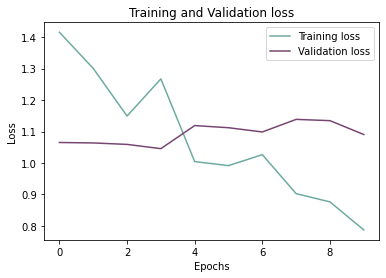

In [57]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

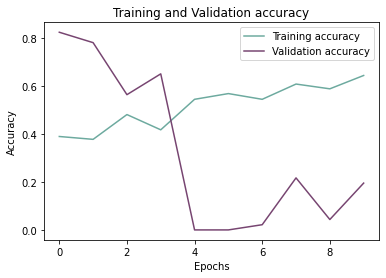

In [58]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Performance METRICS:

In [59]:
batch_size= 32
target_names=  ['Healthy', 'Type 1 disease', 'Type 2 disease' ]
pred= model.predict_generator(testing_set, 46 // batch_size+1)
y_pred= np.argmax(pred, axis=1)

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [61]:
confusion_matrix(testing_set.classes, y_pred)

array([[ 0,  0,  0],
       [21,  0,  5],
       [16,  0,  4]])

In [62]:
print(classification_report(testing_set.classes, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        26
           2       0.44      0.20      0.28        20

    accuracy                           0.09        46
   macro avg       0.15      0.07      0.09        46
weighted avg       0.19      0.09      0.12        46



## 2. Transfer learning using mobile net:

In [63]:
from keras.applications.mobilenet import MobileNet

In [64]:
# re-size all the images to this as vgg16 uses this image size only
Image_size = [48,48]

In [65]:
mobile_net= MobileNet(Image_size + [3], weights= 'imagenet', include_top= False)

17235968/17225924 [==============================] - 1s 0us/step


In [66]:
# don't train existing weights
for layers in mobile_net.layers:
  layers.trainable = False

In [67]:
trf_learn= Sequential()

In [68]:
trf_learn.add(mobile_net)

In [69]:
trf_learn.add(Flatten())

In [70]:
trf_learn.add(Dense(units= 64, activation= 'relu'))
trf_learn.add(Dropout(0.15))
trf_learn.add(BatchNormalization())

In [71]:
trf_learn.add(Dense(units= 32, activation= 'relu'))
trf_learn.add(Dropout(0.15))
trf_learn.add(BatchNormalization())

In [72]:
trf_learn.add(Dense(units= 8, activation= 'relu'))
trf_learn.add(Dropout(0.15))
trf_learn.add(BatchNormalization())

In [73]:
trf_learn.add(Dense(units=3, activation='softmax'))

In [74]:
trf_learn.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [75]:
trf_learn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1, 1, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1024)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                65600     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 32)               

In [76]:
es= EarlyStopping(monitor= 'accuracy', patience= 2)

In [77]:
history= trf_learn.fit(training_set, validation_data= testing_set, callbacks= [es], epochs=10)

Epoch 1/10
8/8 [==============================] - 13s 1s/step - loss: 1.4402 - accuracy: 0.3466 - val_loss: 1.0607 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 1.3255 - accuracy: 0.4024 - val_loss: 1.0666 - val_accuracy: 0.4783
Epoch 3/10
8/8 [==============================] - 9s 1s/step - loss: 1.1720 - accuracy: 0.4303 - val_loss: 1.0840 - val_accuracy: 0.4565
Epoch 4/10
8/8 [==============================] - 9s 1s/step - loss: 1.0977 - accuracy: 0.5219 - val_loss: 1.0883 - val_accuracy: 0.2826
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.9531 - accuracy: 0.5538 - val_loss: 1.0837 - val_accuracy: 0.4130
Epoch 6/10
8/8 [==============================] - 9s 1s/step - loss: 1.1485 - accuracy: 0.4422 - val_loss: 1.0771 - val_accuracy: 0.4348
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 1.0363 - accuracy: 0.4980 - val_loss: 1.0828 - val_accuracy: 0.4565


## Model Performance Plot

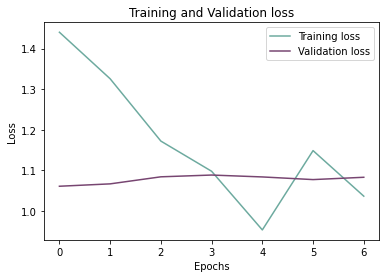

In [78]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

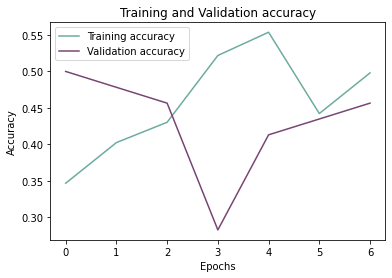

In [79]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Performance Metrics:

In [80]:
batch_size= 32
target_names=  ['Healthy', 'Type 1 disease', 'Type 2 disease' ]
pred= trf_learn.predict_generator(testing_set, 46 // batch_size+1)
y_pred_mobilenet= np.argmax(pred, axis=1)

In [81]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [82]:
confusion_matrix(testing_set.classes, y_pred_mobilenet)

array([[ 0,  0,  0],
       [ 6,  1, 19],
       [ 1,  2, 17]])

In [83]:
print(classification_report(testing_set.classes, y_pred_mobilenet))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.33      0.04      0.07        26
           2       0.47      0.85      0.61        20

    accuracy                           0.39        46
   macro avg       0.27      0.30      0.23        46
weighted avg       0.39      0.39      0.30        46



## 3. Transfer Learning using Densenet121:

In [84]:
from keras.applications.densenet import DenseNet121

In [85]:
# re-size all the images to this as vgg16 uses this image size only
Image_size = [244,244]

In [86]:
dense_net= DenseNet121(Image_size + [3], weights= 'imagenet')

33202176/33188688 [==============================] - 0s 0us/step


In [87]:
dense_net.include_top= False

In [88]:
for layers in dense_net.layers:
  layers.trainable= False

In [89]:
trf= Sequential()

In [90]:
trf.add(dense_net)

In [91]:
trf.add(Flatten())

In [92]:
trf.add(Dense(units= 64, activation= 'relu'))
trf.add(Dropout(0.15))
trf.add(BatchNormalization())

In [93]:
trf.add(Dense(units= 32, activation= 'relu'))
trf.add(Dropout(0.15))
trf.add(BatchNormalization())

In [94]:
trf.add(Dense(units= 8, activation= 'relu'))
trf.add(Dropout(0.5))
trf.add(BatchNormalization())

In [95]:
trf.add(Dense(units=3, activation='softmax'))

In [96]:
trf.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [97]:
trf.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1000)              8062504   
                                                                 
 flatten_3 (Flatten)         (None, 1000)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                64064     
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_9 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                      

In [98]:
es= EarlyStopping(monitor= 'accuracy', patience= 2)

In [99]:
history= trf.fit(training_set, validation_data= testing_set, epochs= 15, callbacks= [es], batch_size= 7)

Epoch 1/15
8/8 [==============================] - 20s 2s/step - loss: 1.3399 - accuracy: 0.3665 - val_loss: 1.0997 - val_accuracy: 0.5435
Epoch 2/15
8/8 [==============================] - 10s 1s/step - loss: 1.4605 - accuracy: 0.3426 - val_loss: 1.1028 - val_accuracy: 0.5652
Epoch 3/15
8/8 [==============================] - 10s 1s/step - loss: 1.1990 - accuracy: 0.3984 - val_loss: 1.1060 - val_accuracy: 0.5652
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 1.3588 - accuracy: 0.3825 - val_loss: 1.1072 - val_accuracy: 0.5652
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 1.2792 - accuracy: 0.4343 - val_loss: 1.1067 - val_accuracy: 0.5652
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 1.1607 - accuracy: 0.4542 - val_loss: 1.1051 - val_accuracy: 0.5652
Epoch 7/15
8/8 [==============================] - 9s 1s/step - loss: 1.1099 - accuracy: 0.4661 - val_loss: 1.1025 - val_accuracy: 0.5652
Epoch 8/15
8/8 [======================

## Model Performance Plot

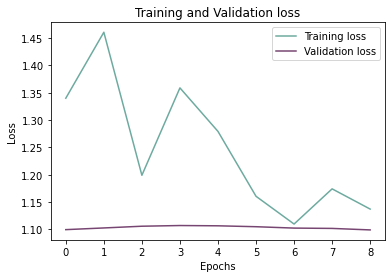

In [100]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#6daa9f", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#774571", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

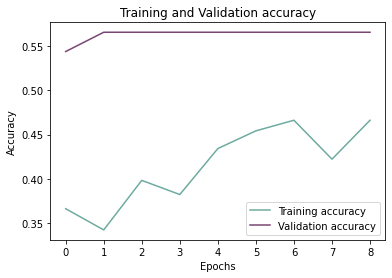

In [101]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Performance Metrics

In [102]:
batch_size= 32
target_names=  ['Healthy', 'Type 1 disease', 'Type 2 disease' ]
pred= trf.predict_generator(testing_set, 46 // batch_size+1)
y_pred_densenet= np.argmax(pred, axis=1)

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [104]:
confusion_matrix(testing_set.classes, y_pred_densenet)

array([[26,  0],
       [20,  0]])

In [105]:
print(classification_report(testing_set.classes, y_pred_densenet))

              precision    recall  f1-score   support

           1       0.57      1.00      0.72        26
           2       0.00      0.00      0.00        20

    accuracy                           0.57        46
   macro avg       0.28      0.50      0.36        46
weighted avg       0.32      0.57      0.41        46



## Final step:   

- Compare all the models on the basis of accuracy, precision, recall, and f1-score

- so the best model is DenseNet121